In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import sweetviz as sv


warnings.filterwarnings("ignore")

%matplotlib inline




In [4]:
df = pd.read_csv('sales.csv')
test = pd.read_csv('real_data.csv')


In [5]:
df.head(5)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,260670,166,2,2013-01-01,0,0,0,a,1,0
1,366950,278,2,2013-01-01,0,0,0,a,1,0
2,179596,519,2,2013-01-01,0,0,0,a,1,0
3,216955,234,2,2013-01-01,0,0,0,a,1,0
4,201196,270,2,2013-01-01,0,0,0,a,1,0


In [6]:
test.head(5)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,419571,637,7,2015-03-01,0,0,0,0,0
1,378043,801,7,2015-03-01,0,0,0,0,0
2,282522,354,7,2015-03-01,0,0,0,0,0
3,77715,371,7,2015-03-01,0,0,0,0,0
4,205875,515,7,2015-03-01,0,0,0,0,0


In [7]:
df.drop('Unnamed: 0' ,axis=1,inplace=True)
test.drop('Unnamed: 0' ,axis=1,inplace=True)

In [8]:
df['date'] =pd.to_datetime(df['date'])
test['date'] =pd.to_datetime(test['date'])



In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.drop(columns=['date'], inplace=True)

In [10]:
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

test.drop(columns=['date'], inplace=True)

In [11]:
df['state_holiday'].replace({'a': 1, 'b': 2 ,'c' :3},inplace=True)
test['state_holiday'].replace({'a': 1, 'b': 2 ,'c' :3},inplace=True)



In [12]:
df['state_holiday'] =df['state_holiday'].astype(int)
test['state_holiday'] =test['state_holiday'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592561 entries, 0 to 592560
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   store_ID             592561 non-null  int64
 1   day_of_week          592561 non-null  int64
 2   nb_customers_on_day  592561 non-null  int64
 3   open                 592561 non-null  int64
 4   promotion            592561 non-null  int64
 5   state_holiday        592561 non-null  int64
 6   school_holiday       592561 non-null  int64
 7   sales                592561 non-null  int64
 8   year                 592561 non-null  int32
 9   month                592561 non-null  int32
 10  day                  592561 non-null  int32
dtypes: int32(3), int64(8)
memory usage: 42.9 MB


# The best library in visualisation  

In [14]:
report = sv.analyze(df)

# Display the report
report.show_html('data_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
X = df.drop('sales',axis=1) 
y = df['sales']

X_train , X_test , y_train , y_test =train_test_split(X,y,
                                                    shuffle=False,
                                                     test_size=0.3
                           
                                              )

# 70% Trainig 
# 30% Testing

In [16]:
model = GradientBoostingRegressor(
    n_estimators=500,     
    max_depth=10,         
    learning_rate=0.1,    
    subsample=0.8          
)


# We tried about 10 models but the best R2 is GradientBoostingRegressor

In [17]:
model.fit(X_train,y_train)


GradientBoostingRegressor(max_depth=10, n_estimators=500, subsample=0.8)

In [20]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)


print(f"\nR2 score on train set: {r2_train:.4}")
print(f"R2 score on test set: {r2_test:.4}\n")
print(f"Mean Absolute Error (MAE): {mae:.5}\n")
print(f"Mean Squared Error (MSE): {mse:.7}\n")
print(f"Root Mean Squared Error (RMSE): {rmse:.5}\n")







R2 score on train set: 0.9942
R2 score on test set: 0.9811

Mean Absolute Error (MAE): 346.12

Mean Squared Error (MSE): 283947.1

Root Mean Squared Error (RMSE): 532.87



# R2 = 98% 

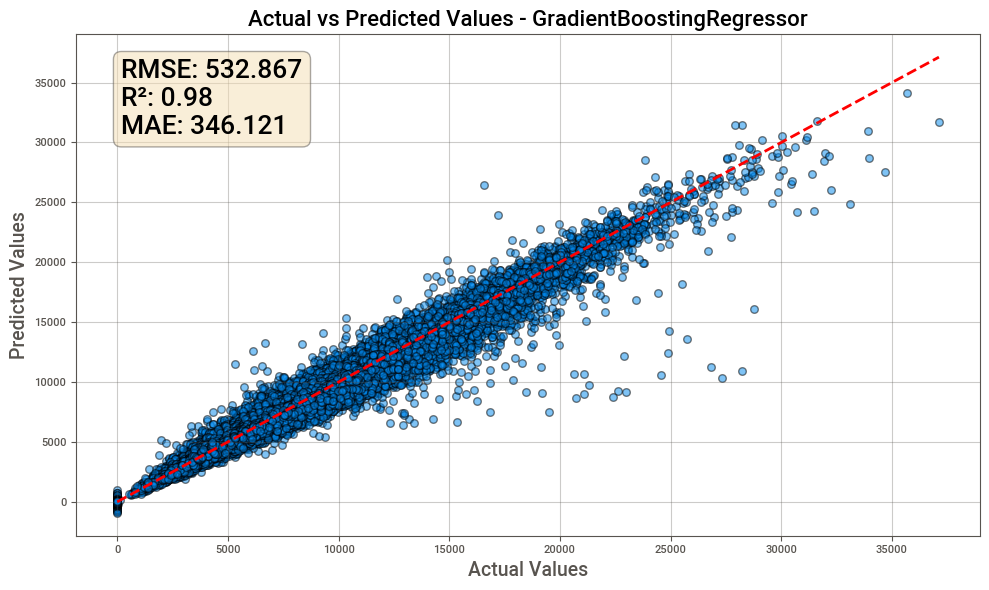

In [50]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolor='k', s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values - GradientBoostingRegressor', fontsize=16)
plt.grid(True, alpha=0.3)

    # Add performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

textstr = '\n'.join((
    f'RMSE: {rmse:.3f}',
    f'R²: {r2:.2f}',
    f'MAE: {mae:.3f}'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=19,
            verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

## now training all the dataset

In [21]:
model.fit(X,y)

GradientBoostingRegressor(max_depth=10, n_estimators=500, subsample=0.8)

# We are now predicting the test file.

In [51]:
y_pred_real_file = model.predict(test)


In [52]:
test_not_clean = pd.read_csv('real_data.csv')
test_not_clean['sales']=y_pred_real_file
test_not_clean.to_csv('pred_real_data.csv')

### solving the sales  0 



# <3

In [53]:
df_pred = pd.read_csv('pred_real_data.csv')
df_pred.loc[df_pred['open'] == 0, 'sales'] = 0
df_pred['sales'].astype(int)
df_pred['sales']=df_pred['sales'].astype(int)
df_pred.to_csv('pred_real_data.csv')